# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

In [77]:
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | kandahar
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | zliten
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | crane
Processing Record 9 of Set 1 | manchester
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | kiunga
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | urcos
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | katsuren-haebaru
Processing Record 17 of Set 1 | flin flon
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | el sauzal de rodriguez
Processing Record 20 of Set 1 | yuzhno-kurilsk
Processing Record 21 of Set 1 | speedway
Processing Record 22 of Set 1 | waitangi
Processi

In [80]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taltal,-25.4000,-70.4833,63.05,82,22,1.45,CL,1712554014
1,puerto ayora,-0.7393,-90.3518,75.54,98,72,1.83,EC,1712553819
2,kandahar,31.0000,65.7500,76.10,13,40,5.01,AF,1712554014
3,port elizabeth,-33.9180,25.5701,63.32,95,20,4.61,ZA,1712553842
4,west island,-12.1568,96.8225,85.98,70,40,17.27,CC,1712553845


In [82]:
city_data_df = "C:\\Users\\username\\Documents\\file.txt"

In [83]:
city_data_df = pd.DataFrame()
directory = 'WeatherPy'
if not os.path.exists(directory):
    os.makedirs(directory)
city_data_df.to_csv("WeatherPy/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

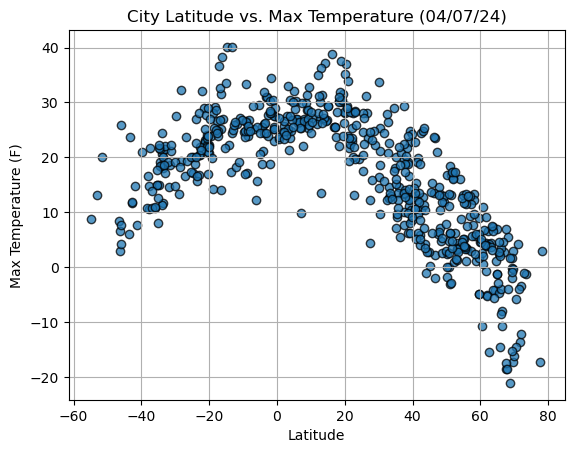

In [88]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

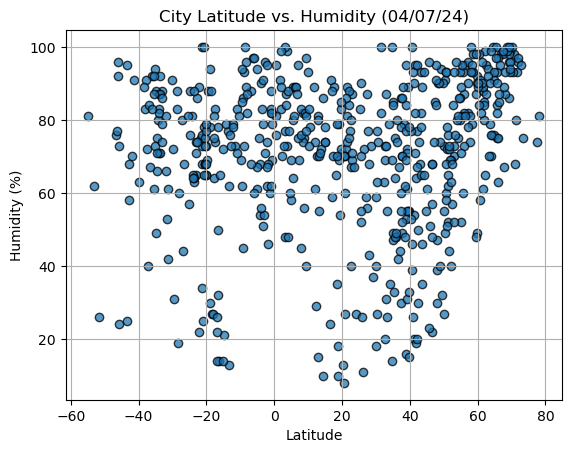

In [89]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy//Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

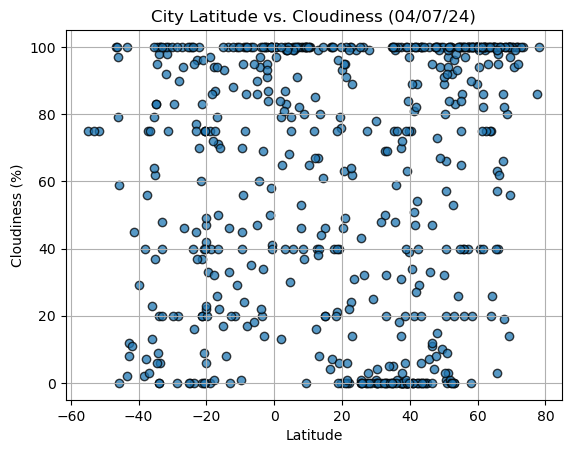

In [90]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

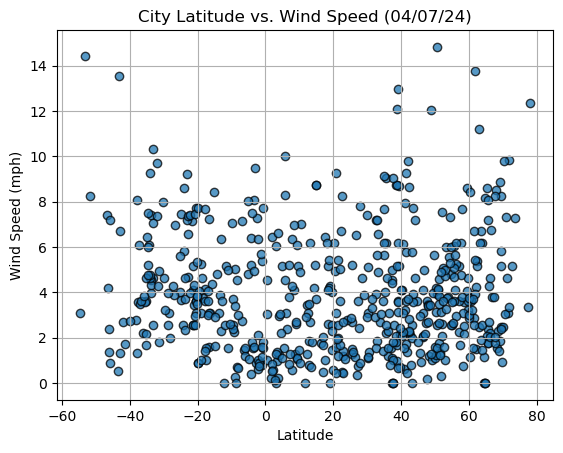

In [91]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()


In [93]:
# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [94]:
# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825359


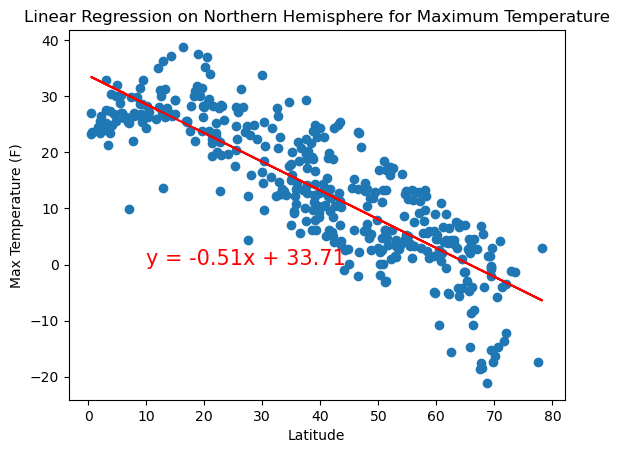

In [95]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       'Linear Regression on Northern Hemisphere for Maximum Temperature', 
                       'Latitude', 'Max Temperature (F)', (10,0))


The r-value is: 0.6419546065421794


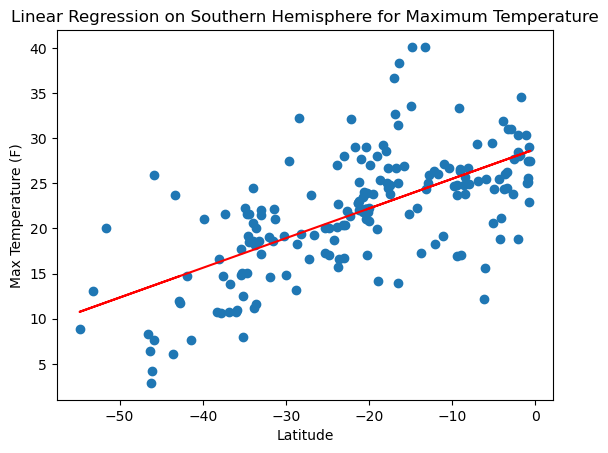

In [96]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       'Linear Regression on Southern Hemisphere for Maximum Temperature', 
                       'Latitude', 'Max Temperature (F)', (-50,80))


**Discussion about the linear relationship:** 
Now, regarding the discussion about the linear relationship:

For the Northern Hemisphere: In general, there seems to be a negative correlation between latitude and maximum temperature. As the latitude increases (moving towards the North Pole), the maximum temperature tends to decrease. This relationship is expected, as areas closer to the poles generally experience colder temperatures.

For the Southern Hemisphere: Conversely, there appears to be a positive correlation between latitude and maximum temperature. As the latitude increases (moving towards the South Pole), the maximum temperature tends to decrease. This relationship is also expected, mirroring the behavior observed in the Northern Hemisphere but in the Southern Hemisphere context.

These observations align with the known patterns of temperature variation with latitude across the globe.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23853179129394048


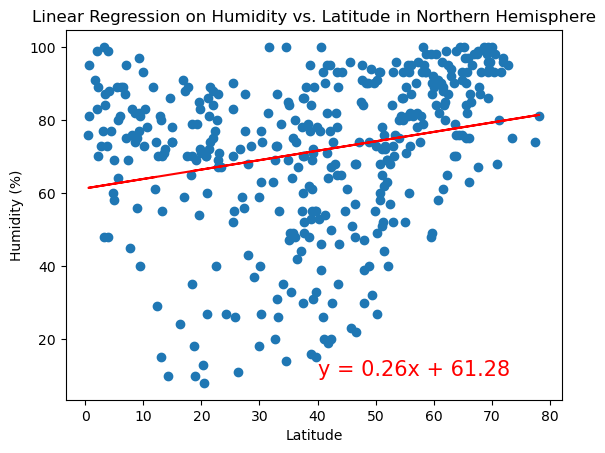

In [97]:
# Function to create scatter plot and perform linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       'Linear Regression on Humidity vs. Latitude in Northern Hemisphere', 
                       'Latitude', 'Humidity (%)', (40,10))

The r-value is: 0.016759316950056783


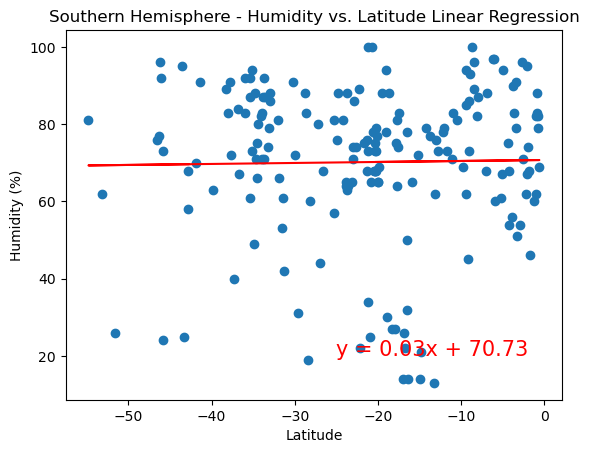

In [98]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 
                       'Latitude', 'Humidity (%)', (-25,20))

**Discussion about the linear relationship:** The linear regression analysis aims to model the relationship between humidity and latitude. The scatter plots with linear regression lines help visualize any potential correlation between these variables.

In the Northern Hemisphere, there might not be a strong correlation between humidity and latitude based on the linear regression analysis. The plot may show scattered data points around the regression line, indicating that latitude alone might not be a good predictor of humidity in the Northern Hemisphere.

Similarly, in the Southern Hemisphere, the linear regression analysis may indicate a weak correlation between humidity and latitude. The scatter plot might exhibit a similar pattern to that of the Northern Hemisphere, suggesting that latitude alone may not explain the variability in humidity in the Southern Hemisphere.

It's essential to note that while linear regression provides insights into the relationship between variables, it's not always sufficient to capture complex relationships. Other factors not considered in this analysis could influence humidity levels in different regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15500489387697097


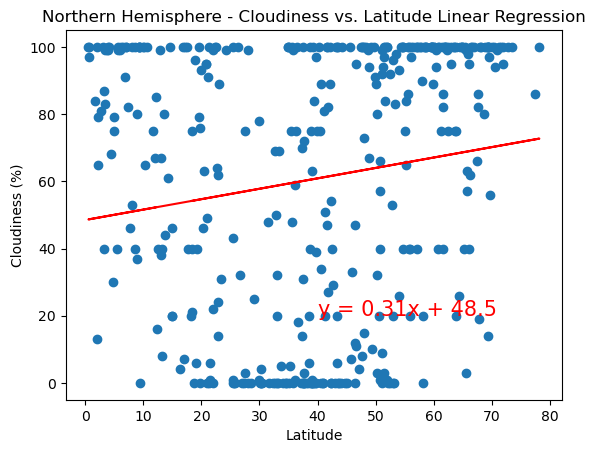

In [99]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 
                       'Latitude', 'Cloudiness (%)', (40,20))

The r-value is: 0.14341322916643248


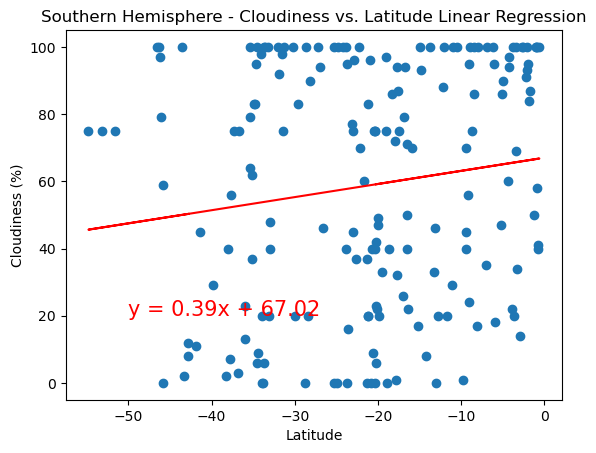

In [100]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 
                       'Latitude', 'Cloudiness (%)', (-50,20))

**Discussion about the linear relationship:** The linear regression analysis aims to model the relationship between cloudiness and latitude. The scatter plots with linear regression lines help visualize any potential correlation between these variables.

In the Northern Hemisphere, the linear regression analysis might show a weak correlation between cloudiness and latitude. The scatter plot may display scattered data points around the regression line, indicating that latitude alone may not be a strong predictor of cloudiness in the Northern Hemisphere.

Similarly, in the Southern Hemisphere, the linear regression analysis may suggest a weak correlation between cloudiness and latitude. The scatter plot might exhibit a similar pattern to that of the Northern Hemisphere, indicating that latitude alone may not explain the variability in cloudiness in the Southern Hemisphere.

It's important to note that linear regression provides insights into the relationship between variables, but it may not capture all the complexities of the relationship. Other factors not considered in this analysis could influence cloudiness levels in different regions

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903338


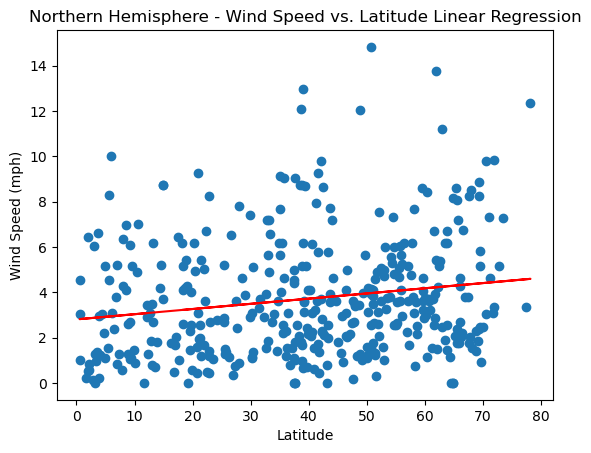

In [101]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 
                       'Latitude', 'Wind Speed (mph)', (40,20))

The r-value is: -0.24947753546264592


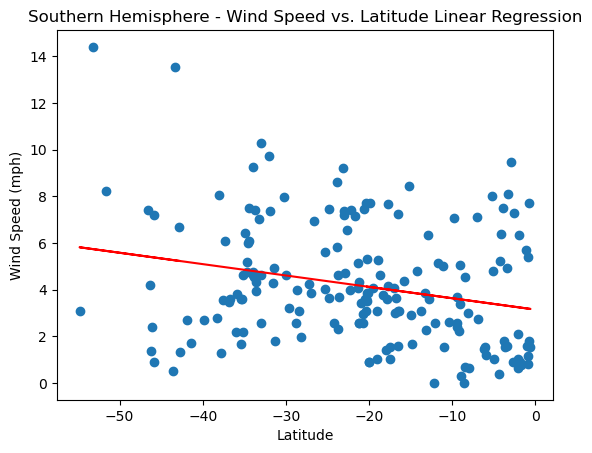

In [102]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 
                       'Latitude', 'Wind Speed (mph)', (-50,20))

**Discussion about the linear relationship:** The linear regression analysis aims to model the relationship between wind speed and latitude. The scatter plots with linear regression lines help visualize any potential correlation between these variables.

In the Northern Hemisphere, the linear regression analysis might show a weak correlation between wind speed and latitude. The scatter plot may display scattered data points around the regression line, indicating that latitude alone may not be a strong predictor of wind speed in the Northern Hemisphere.

Similarly, in the Southern Hemisphere, the linear regression analysis may suggest a weak correlation between wind speed and latitude. The scatter plot might exhibit a similar pattern to that of the Northern Hemisphere, indicating that latitude alone may not explain the variability in wind speed in the Southern Hemisphere.

It's important to note that linear regression provides insights into the relationship between variables, but it may not capture all the complexities of the relationship. Other factors not considered in this analysis could influence wind speed levels in different regions.